In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lab 9 - Linear Models - Part 1 - Solution

There's no way I'm going to come up with exactly the same solutions as you did. This is more or less a walk through of the techniques for generating synthetic data for linear models.

The key point is understanding how the patterns must present themselves in the data in order for linear models to find those patterns and how strong the patterns need to be to find them. 

Every algorithm has a sweet spot, it's representational bias. This is how they represent the pattern they find. There's an inductive bias as well. This is how they search the various versions of their particular representation to find the "best" one. Bias is not a bad thing here; Mitchell proved decades ago that an unbiased algorithm *cannot learn* and by "learn" we mean generalize beyond the observations.

We don't want an algorithm that memorizes 2 + 2 = 4 and 4 + 4 = 8. We want an algorithm that infers that 3 + 3 = 6. It's even better if we have an algorithm that is robust in the presence of noise and so when it sees 3 + 3 = 7, it makes the generalization that 3 + 3 = 6.


In [2]:
% matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [3]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import models 

sns.set(style="whitegrid")

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Synthetic Data

It's very important to understand the underlying data generated by the model you're building and to understand how the algorithm you're using to build the model works. Both of these ends can be accomplished by generating synthetic data and then trying to see if you can recover the "correct" model you used to generate the data.

Generate the following synthetic data sets and model them with the appropriate linear model from the chapter. You can also refer to the chapter to see how to generate the synthetic data (as well as previous labs).

For each of these, save a different random seed. *You may wish to develop each of these models in a separate notebook and then copy them, when done, into your final Lab notebook.*

**Discussion**

There are a few things to remember.

1. "Noise" can only come from $\epsilon$, $x_i$ is all "signal". Therefore, it doesn't actually matter how $x_1$ is distributed but Normal is as good as anything.
2. Remember how "mixtures" work from EDA. If we want to generate data where there are no apparent subpopulations, that's just $x \sim N(\mu, \sigma)$. If we want to generate data where there are apparent subpopulations, that's a mixture of two or more Normal distributions: $x \sim N(\mu_{x_1}, \sigma_{x_1}) + N(\mu_{x_2}, \sigma_{x_2})$, where "+" means concatenate. If there are more subpopulations, we add in more Normals.

It's not very common for these distributions to be completely distinct. Their means will be different and their standard deviations may be different but, in general, there will be overlap. If you look at men and women's heights. They have different means but there is some overlap. There are some women who are taller than some men. Our ability to detect these differences depends on the sizes of our samples and just how distinct the differences are.

3. We looking for signal in the data. The interplay of $\beta_i$ and $\beta_0$ and $\epsilon$ are what shift the balance of signal and noise. After all, it doesn't do us any good for all the $\beta_i$ to be bad and $\beta_0$ to be good...that's just saying that $y$ is a constant with some noise!

**Linear Regression**

1. Generate a model $\beta_0 + \beta_1 x_1$ where $x_1 \sim N(50.0, \sigma_{x_1})$. Pick your own $\beta_0$ and $\beta_1$ but chose $\epsilon \sim N(0, \sigma)$ so that the $R^2$ is around 0.60.

In [4]:
np.random.seed(84723466)

Let's try:

$\sigma_{x_1} = 1.0$ (doesn't matter)

$\beta_1 = 2.5$

$\beta_0 = 5.00$

At a mean of 50, $y$ will be 5 + 2.5 * 50 = 130. That's the signal. We want about 40% noise. How do we get there? We can work with the coefficient of variation. If the mean of $y$ is 130 at the mean of $x$, what will a 20% variation give us a $R^2$ of 60%?

In [5]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 26, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
x    100 non-null float64
e    100 non-null float64
y    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [7]:
data.head()

,x,e,y
0,48.217792,58.135254,183.679732
1,49.985930,23.150633,153.115459
2,50.235132,11.226296,141.814126
3,49.574976,-28.007213,100.930227
4,51.216524,61.687236,194.728546


In [8]:
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

No! That's way too much noise. So there isn't an easy relationship between $\epsilon$ and $R_2$. Let's try something less noisy:

In [9]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 5.0, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)

In [10]:
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

Nope, still too noisy. What is CV?

In [11]:
data.y.describe()

count    100.000000
mean     130.340522
std        5.416639
min      115.213801
25%      125.793720
50%      130.412545
75%      133.792147
max      140.391554
Name: y, dtype: float64

The coefficient of variation for $y$ is 5.42/130 = 0.004159632. That's pretty small. What does this look like?

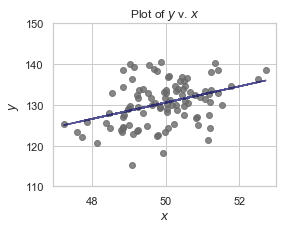

In [12]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data.x, data.y, color="dimgray", alpha=0.8)

beta = results[ "coefficients"]
axes.plot(data.x, [beta[ 0] + beta[ 1] * x for x in data.x], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x$")
axes.set_title(r"Plot of $y$ v. $x$")
axes.set_ylim((110, 150))
plt.show()
plt.close()

Let's try the example from *Fundamentals* to make sure we're not crazy:

In [13]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 1, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)

In [14]:
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

It's close. It's different because the example in *Fundamentals* has $\beta_0$ = 0.

If $\sigma = 5.0$ had an $R^2$ of 14.4% and a $\sigma = 1.0$ had an $R^2$ of 86.0%, is this linear? If we pick a $\sigma$ at the midpoint, will the $R^2$ be at the midpoint? (5 - 1)/2 + 1 = 3 versus (86.0 - 14.4)/2 + 14.4 = 50.2 (?)

In [15]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 3, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)

In [16]:
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

It doesn't appear to be linear. This makes some sense. $R^2$ is bounded by 1.0 and $\sigma$ is bounded from below by 0, the relationship must probably be non-linear if for not other reason than it is likely asymptotic at the bounds. What does this amount of noise look like?

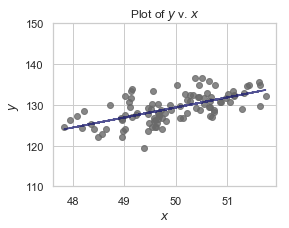

In [17]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data.x, data.y, color="dimgray", alpha=0.8)

beta = results[ "coefficients"]
axes.plot(data.x, [beta[ 0] + beta[ 1] * x for x in data.x], '-', color="midnightblue", alpha=0.75)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x$")
axes.set_title(r"Plot of $y$ v. $x$")
axes.set_ylim((110, 150))
plt.show()
plt.close()

Visually, this doesn't seem like a lot of noise...and yet the $R^2$ is only 38.5%. Additionally, we still seem to be estimating the coefficients properly. Even in the high noise case, they weren't *horribly* off. Does this mean that bad *predictive* models may not be bad *explanatory* models?

Let's halve the noise again to 1.5:

In [18]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 1.5, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)

In [19]:
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

Getting warmer. At this point you might just try values to get to the goal but you should have *thought* about the relationship as you did this. This is the benefit of working with synthetic data.

In [20]:
data = {}
data["x"] = stats.norm.rvs(50.0, 1, 100)
data["e"] = stats.norm.rvs(0, 2.5, 100)
data["y"] = 5.0 + 2.5 * data["x"] + data["e"]
data = pd.DataFrame(data)
results = models.linear_regression("y ~ x", data)
models.simple_describe_lr(results)

That's pretty close. One observation...if you don't want to completely re-run the notebook every single time. The random seed should be reset for each and every experiment. We'll do that from now on. Let's do the full bootstrap:

In [21]:
results = models.bootstrap_linear_regression("y ~ x", data)
models.describe_bootstrap_lr(results)

There's a lot of variability here. With this much noise, our estimate of $\beta_1$ is a bit off. The estimate of $\sigma$ is nearly exact but that's what we'd expect. The data is generated by the exact model we're using to model it! This isn't likely to happen in real world data.

The $R^2$ is what we were shooting for but our general estimate of this model from this data could vary widely. It would be interesting to see if we get the same kinds of results with 10x more data (?).

(If you're going to understand how this works at an intuitive level, you're going to have to do a lot of this).

2. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 \sim N(50.0, \sigma_{x_1})$ and $x_2 \sim Bernouilli(p)$. Pick your own $\beta_i$ and $p$ but pick $\epsilon \sim N(0, $\sigma$)$ so that $R^2$ is around 0.8.

This one is tricky but we can take a few things that have been established so far into consideration:

1. We can take this in pieces.
2. We need to reinterpret $x_1 \sim N(50.0, \sigma_{x_1})$ to include subpopulations.
3. We can use the observation above $x \sim N(\mu_{x_1}, \sigma_{x_1}) + N(\mu_{x_2}, \sigma_{x_2})$ but realize that "x" is just "some variable", that "some variable" might be "y" and the "$x_1$" might be "x" or some other variable. Notation is just notation; it's the underlying pattern that matters.
4. We can use the information from the module: $y \sim N(\beta_0 + \beta_1 x_1, \sigma)$.

The most important thing to understand is that it always starts with the categorical variable(s) so let's sort them out first. We have an "x1" that is categorical, binary with Bernoulli distribution of $p$. Let's make $p = 0.67$:

In [22]:
np.random.seed(546373)

In [23]:
data = {}
data["x2"] = [1 if k < 0.67 else 0 for k in stats.uniform.rvs(0, 1, 100)]
data["x2"][1:10]

[0, 0, 1, 1, 0, 1, 1, 1, 1]

If we want the overall mean to be 50, we can pick something where the weighted average is is 50.0. The weights are $p$ and $1-p$. That's about 52 for $x_2 = 1$ and 47 for $x_2 = 0$. The overall and individual variances are not specified but let's make them 10%:

In [24]:
data["x1"] = [stats.norm.rvs(50, 5) if x2 == 1 else stats.norm.rvs(47, 4.7) for x2 in data["x2"]]
data["x1"][1:10]

[37.01869338822434,
 48.3288342504206,
 43.01575004949211,
 49.82446398716534,
 53.05182703264607,
 50.577508493151335,
 48.66230915788665,
 59.200905062365756,
 46.899458063301296]

What does it mean that there's a $\beta_1$ and $\beta_3$? The first one is the going to be the overall or reference slope and the second is an adjustment to it. What is the baseline? In this case when $x_2=0$. What is the adjustment? when $x_2=1$.

What we need to produce $y$ are *two* equations, one for when $x_2=0$ and one for when $x_2=1$:

$y = \beta_0^{(0)} + \beta_1^{(0)} x_1$

$y = \beta_0^{(1)} + \beta_1^{(1)} x_1$

we need to pick values for these coefficients even though we won't be estimating them coefficients directly. Instead we estimate:

$\beta_0^{(0)} = \beta_0$

$\beta_0^{(1)} = \beta_0 + \beta_2$

$\beta_1^{(0)} = \beta_1$

$\beta_1^{(1)} = \beta_1 + \beta_3$

Let's do something easy:

$y = 10.0 + 2.5 x_1$ for $x_2 = 0$

$y = 20.0 + 1.25 x_1$ for $x_2 = 1$

We'll let this be $z$ or the pure signal:

In [25]:
data["z"] = [10.0 + 2.5 * x1 if x2 == 0 else 20.0 + 1.25 * x1 for x1, x2 in zip(data["x1"], data["x2"])]
data["z"][1:10]

[102.54673347056085,
 130.8220856260515,
 73.76968756186514,
 82.28057998395667,
 142.62956758161516,
 83.22188561643917,
 80.82788644735831,
 94.0011313279572,
 78.62432257912661]

What *must* be the same for both is the noise or $\epsilon = N(0, \sigma)$. We'll set $\sigma$ to 1 for a start:

In [26]:
data["e"] = stats.norm.rvs(0, 1, 100)

In [27]:
data["y"] = data["z"] + data["e"]

In [28]:
data = pd.DataFrame(data)

In [29]:
data.head()

,x2,x1,z,e,y
0,0,42.531964,116.329910,-2.012629,114.317281
1,0,37.018693,102.546733,-0.929018,101.617716
2,0,48.328834,130.822086,-0.227557,130.594529
3,1,43.015750,73.769688,-0.343804,73.425883
4,1,49.824464,82.280580,0.233748,82.514328


Let's see what the data looks like:

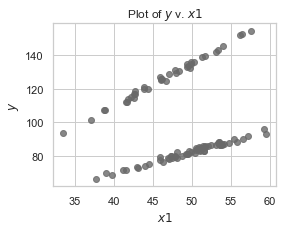

In [30]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data.x1, data.y, color="dimgray", alpha=0.8)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x1$")
axes.set_title(r"Plot of $y$ v. $x1$")

plt.show()
plt.close()

Ok, "A" for effort but data is never that separated in the real world. It's possible our subpopulations overlap *too* much but let's see what happens. Let's bring the lines closer together:

In [31]:
data["z"] = [3 + 0.9* x1 if x2 == 0 else 23.0 + 0.5 * x1 for x1, x2 in zip(data["x1"], data["x2"])]
data["y"] = data["z"] + data["e"]

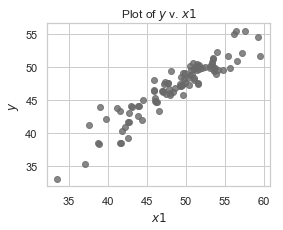

In [32]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data.x1, data.y, color="dimgray", alpha=0.8)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x1$")
axes.set_title(r"Plot of $y$ v. $x1$")

plt.show()
plt.close()

After quite a few tries, I was able to get the "lines" to cross as in the above. Do we know what parameters we're actually estimating?

$y = 3.0 + 0.9 x_1$ for $x_2 = 0$

$y = 23.0 + 0.5 x_1$ for $x_2 = 1$

which translates to:

$3.0 = \beta_0$

$23.0 = \beta_0 + \beta_2$

$0.9 = \beta_1$

$0.5 = \beta_1 + \beta_3$


Let's run the regression:

In [33]:
results = models.linear_regression("y ~ x1 + x2 + x1:x2", data)
models.simple_describe_lr(results)

Well, it's not *awful*. We expected 3.0 for $\beta_0$ and we got 0.84. For $\beta_0 + \beta_2$ we expected 23.0 and we got 22.22. For $\beta_1$ we expected 0.9 and we got 0.95. That's good. For $\beta_1 + \beta_3$ we wanted 0.5 and got 0.52 which is nearly perfect.

So our *effects* were recovered fairly accurately. The *difference* in the base for $x_2 = 1$ is also fairly accurate (21.38 is about 20). The actual base for $x_2 = 0$ is not great but the intercept rarely is. It's sort of what's leftover.

What about the full bootstrap estimate?

In [34]:
results = models.bootstrap_linear_regression("y ~ x1 + x2 + x1:x2", data)
models.describe_bootstrap_lr(results)

That all looks really good.

3. Create a model of your own choosing that explores a relationship or concept that you're curious about (for example, how do $\sigma$ and $R^2$ relate?)

Let's stay with the current example. What if the data "crosses"? What if something is positive effect for one group and a negative effect for another. Will linear regression still work?

In [35]:
data["z"] = [120 - 0.9* x1 if x2 == 0 else 23.0 + 1.0 * x1 for x1, x2 in zip(data["x1"], data["x2"])]
data["y"] = data["z"] + data["e"]

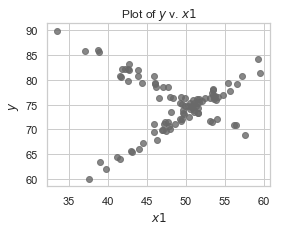

In [36]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data.x1, data.y, color="dimgray", alpha=0.8)

axes.set_ylabel(r"$y$")
axes.set_xlabel(r"$x1$")
axes.set_title(r"Plot of $y$ v. $x1$")

plt.show()
plt.close()

Again, it's unlikely to be so *crisp* a pattern but let's go with it. What do we expect? The base equation is for $x_2 = 0$ so we expect:

$120 - 0.9 x_1$

and then we expect an adjustment to $\beta_0$ to make 120 be 23 and an adjustment to $\beta_1$ to make -0.9 be 1.0:

In [37]:
results = models.bootstrap_linear_regression("y ~ x1 + x2 + x1:x2", data)
models.describe_bootstrap_lr(results)

Amazingly, that's almost exactly what we get.

We could do more experimentation to see how overall noise affects our ability to find the signal.

**Logistic Regression**

1. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 \sim N(50.0, 5.0)$ and $x_2 \sim Bernouilli(0.67)$. Pick your own $\beta_i$ but try to get the error rate to be 15% or lower.

I'm not going to lie. Generating data for the logistic regression is *hard*. It's not nearly as intuitive as Linear Regression because of all the transformations. The basic idea, however, is the same. There are subpopulations with slightly (or greatly) different characteristics. Additionally, the constraint of $N(50.0, 5.0)$ is just not doable; it was meant to get you started but it's a bad start.

We need to start with the subpopulations. In this case, again, $x_2$. We have a sense of two groups and each group has some Bernoulli characteristic, say, voting or purchasing. That characteristic has a probability attached but the probability isn't a constant. It's a function of 1) being in the group and 2) some other, numeric characteristic (age, income).

There's no reason, however, we can't start with where we are. Let's take the starter data ($x_1$ and $x_2$) from above and re-jigger it into the *Fundamentals* logistic regression synthetic data generation.

In [38]:
def logistic( z):
    return 1.0 / (1.0 + np.exp( -z))

In [39]:
np.random.seed(663527323)

In [40]:
data = {}

data["x2"] = [1 if k < 0.67 else 0 for k in stats.uniform.rvs(0, 1, 100)]
data["x1"] = [stats.norm.rvs(50, 5) if x2 == 1 else stats.norm.rvs(47, 4.7) for x2 in data["x2"]]
data["z"] = [3 + 0.9* x1 if x2 == 0 else 23.0 + 0.5 * x1 for x1, x2 in zip(data["x1"], data["x2"])]
data["pr"] = list(map(lambda z: logistic(z), data["z"]))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))

data = pd.DataFrame(data)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
x2    100 non-null int64
x1    100 non-null float64
z     100 non-null float64
pr    100 non-null float64
y     100 non-null int64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [42]:
data.y.mean()

1.0

So...that didn't work quite right. As we have mentioned before, the coefficients on logistic regression, because they represent entirely different things than in linear regression, have a different "space" to them. Let's try a different formula:

In [43]:
data = {}

data["x2"] = [1 if k < 0.67 else 0 for k in stats.uniform.rvs(0, 1, 100)]
data["x1"] = [stats.norm.rvs(50, 5) if x2 == 1 else stats.norm.rvs(47, 4.7) for x2 in data["x2"]]
data["z"] = [0.25 - 0.05 * x1 if x2 == 0 else 0.10 + 0.01 * x1 for x1, x2 in zip(data["x1"], data["x2"])]
data["pr"] = list(map(lambda z: logistic(z), data["z"]))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))

data = pd.DataFrame(data)

In [44]:
data.y.mean()

0.54

If we stick to predicting $y=1$ then we'll have an error rate of 1 - 0.41 = 0.59. Do you think there's anything silly about that? We should also look at the crosstab to make sure that $x_2$ doesn't just flat out predict $y$:

In [45]:
result = pd.crosstab(data.y, data.x2).apply(lambda r: r/len(data), axis=1)
print( result)

x2     0     1
y             
0   0.29  0.17
1   0.03  0.51


Let's go with that for now. The interesting thing is that a base error rate of 15% isn't really that interesting because you can be 85% accurate if you just flip it around an predict "not in the class" (predict $y$ = 0 instead of $y$ = 1).

In [46]:
result = models.logistic_regression("y ~ x1 + x2 + x1:x2", data)
models.simple_describe_lgr(result)

Regardless of how we use the constant model (predict $y=1$ with 59% error rate or $y=0$ with a 41% error rate), this model is better with a 25% error rate.  In the next module we'll learn how to fine tune our understanding of the model's performance with a *confusion matrix*.

As far the estimates of the coefficients are concerned, we have the same basic pattern as before. The base ($\beta_0$) is 25 and that's actually correct. The base *effect* ($\beta_1$) is -0.05 and that's correct. The adjustment to the base ($\beta_2$ over $\beta_0$) is 0.19 so that's 0.44 and definitely not correct. The adjustment to the base effect is $\beta_3$ or 0.06 which makes the effect for when $x_2=1$, 0.01, and that is correct. So the model was estimated correctly for most of the parameters. Let's look at the Bootstrapped version:

In [47]:
result = models.bootstrap_logistic_regression("y ~ x1 + x2 + x1:x2", data)
models.describe_bootstrap_lgr(result, sd=3)

If $x_2=0$, the base probability $P(y=1)$ is 56%. For every increase in $x_1$, we *decrease* that probability by 1 percentage point. If $x_2=1$, the base probability is 0.61 and for every increase in $x_1$, we increase the probability by 0.1 percentage points.

2. Create a model of your own choosing that explores a relationship or concept that you're curious about.

Well, it's a lot more difficult to generate synthetic data for a logistic regression. Let's go back to the single, numeric variable data as we had in the course notes.

In [48]:
np.random.seed(362412353)

Let's try to get a model that's about 60/40. At the mean of $x$, we want the probability of $y=1$ to be 60%. As we increase $x$, we want the probability of $y$ to increase and as we decrease $x$, we want the probability of $y$ to decrease.

Let's start at $x \sim N(125, ?)$. Now, what kind of standard deviation do we want? As $x$ decreases or increases from the mean, we want the probability to decrease by 2 percentage points. 50/2 = 25 so the logistic function will be pretty much saturated by $x=100$. That should be a rare value. Similarly for the other direction, so 150 should be a rare value. 25/3 = 8.3 for a standard deviation ("3" because of 3 standard deviations).

The log odds of $p=50$ is the log of 60/40:

In [54]:
np.log10(60/40)

0.17609125905568124

so $\beta_0$ should be 0. If we use the "divide by 4" rule in reverse, 0.02 * 4 = 0.08 for $\beta_1$:

In [76]:
data = {}
data["x"] = stats.norm.rvs(125, 8.3, 100)
data["z"] = 0.176 + 0.08 * data["x"]
data["pr"] = list(map(lambda z: logistic(z), data["z"]))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))
data = pd.DataFrame(data)

In [77]:
data.y.mean()

1.0

Ok, *that* didn't work. What's up?

Well, we severely underestimate what a "change of 1" in x means in terms of the derivative. If we make the coefficient 1/100th of it's value, we have:

In [78]:
data["z"] = 0.176 + 0.0008 * data["x"]
data["pr"] = list(map(lambda z: logistic(z), data["z"]))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))
data = pd.DataFrame(data)

In [79]:
data.y.mean()

0.65

That's closer to what we wanted. What is the estimated model?

In [80]:
result = models.logistic_regression("y ~ x", data)
models.simple_describe_lgr(result, sd=3)

Our base probability is:

In [81]:
logistic(-0.099)

0.47527019476983695

which is close to what we wanted. And what about $\beta_1$? It's about 10 times larger than it "should" be. We probably need more data to estimate correctly. In terms of probability, it's about 0.15 percentage points per unit of $x$:

In [82]:
0.006/4

0.0015

which is a little bit higher than we wanted. It's sort of interesting to see. You have to play around a bit more with that to understand what's going on but it's not easy because the data is non-linear.

Let's see the bootstrap version:

For each of these, you may use the "normal" versions of the functions (non-bootstrap) to explore the problem and parameters but your final model should be the bootstrap version.

In [83]:
result = models.bootstrap_logistic_regression("y ~ x", data)
models.describe_bootstrap_lgr(result, sd=3)

The credible intervals contain the true values but we're back to one of our original observations. It seems to take more data to estimate a logistic regression as opposed to a linear regression.

**Group Discussion** Share *one* model with your group that you think is particularly interesting or surprising.